# Import software libraries and load the dataset #

In [1]:
import sys                                             # Read system parameters.
import os                                              # Interact with the operating system.
import numpy as np                                     # Work with multi-dimensional arrays and matrices.
import pandas as pd                                    # Manipulate and analyze data.
import matplotlib as mpl                               # Create 2D charts.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb                                   # Perform data visualization.
import sklearn                                         # Perform data mining and analysis.
from time import time                                  # Calculate training time.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- scikit-learn {}\n'.format(sklearn.__version__))

# Load the dataset.
PROJECT_ROOT_DIR = '.'
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, 'power_plant_data')
print('Data files in this project:', os.listdir(DATA_PATH))
data_raw_file = os.path.join(DATA_PATH, 'cc_power_plant_data.csv')
data_raw = pd.read_csv(data_raw_file)
print('Loaded {} records from {}.'.format(len(data_raw), data_raw_file))

Libraries used in this project:
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- NumPy 1.16.2
- pandas 0.24.2
- Matplotlib 3.0.3
- scikit-learn 0.20.3

Data files in this project: ['cc_power_plant_data.csv']
Loaded 9568 records from ./power_plant_data/cc_power_plant_data.csv.


# Get acquainted with the dataset

In [2]:
print(data_raw.info())     # View features and data types.
data_raw.head(10)          # View first 10 records.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
Temperature         9568 non-null float64
ExhaustVacuum       9568 non-null float64
AmbientPressure     9568 non-null float64
RelativeHumidity    9568 non-null float64
EnergyOutput        9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None


,Temperature,ExhaustVacuum,AmbientPressure,RelativeHumidity,EnergyOutput
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
5,13.97,39.16,1016.05,84.60,470.96
6,22.10,71.29,1008.20,75.38,442.35
7,14.47,41.76,1021.98,78.41,464.00
8,31.25,69.51,1010.25,36.83,428.77
9,6.77,38.18,1017.80,81.13,484.31


# Examine the distribution of the features

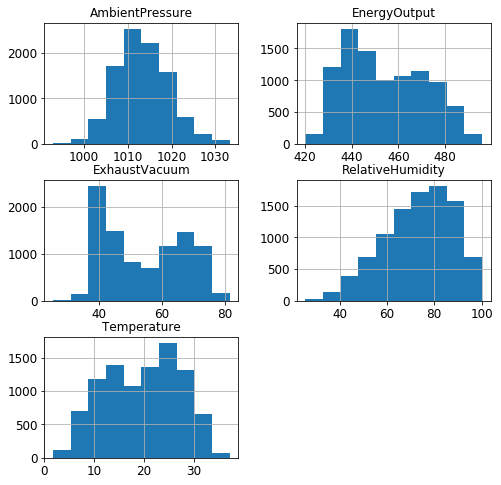

<Figure size 432x288 with 0 Axes>

In [3]:
# Use Matplotlib to plot figures.
%matplotlib inline
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

data_raw.hist(figsize = (8, 8));
plt.figure();

# Examine a general summary of statistics

In [4]:
with pd.option_context('float_format', '{:.2f}'.format): 
    print(data_raw.describe())

       Temperature  ExhaustVacuum  AmbientPressure  RelativeHumidity  \
count      9568.00        9568.00          9568.00           9568.00   
mean         19.65          54.31          1013.26             73.31   
std           7.45          12.71             5.94             14.60   
min           1.81          25.36           992.89             25.56   
25%          13.51          41.74          1009.10             63.33   
50%          20.34          52.08          1012.94             74.97   
75%          25.72          66.54          1017.26             84.83   
max          37.11          81.56          1033.30            100.16   

       EnergyOutput  
count       9568.00  
mean         454.37  
std           17.07  
min          420.26  
25%          439.75  
50%          451.55  
75%          468.43  
max          495.76  


# Look for columns that correlate with `EnergyOutput`#

In [5]:
# Correlations between numeric features and 'EnergyOutput'.
print('Correlations with EnergyOutput')
print(data_raw.corr()['EnergyOutput'].sort_values(ascending=False))

Correlations with EnergyOutput
EnergyOutput        1.000000
AmbientPressure     0.518429
RelativeHumidity    0.389794
ExhaustVacuum      -0.869780
Temperature        -0.948128
Name: EnergyOutput, dtype: float64


# Split the datasets

In [6]:
from sklearn.model_selection import train_test_split

# 'EnergyOutput' is the dependent variable (value to be predicted), so it will be
# removed from the training data and put into a separate DataFrame for labels.
label_columns = ['EnergyOutput']

training_columns = ['Temperature', 'ExhaustVacuum', 'AmbientPressure', 'RelativeHumidity']

# Split the training and test datasets and their labels.
X_train, X_test, y_train, y_test = train_test_split(data_raw[training_columns],
                                                                            data_raw[label_columns],
                                                                            random_state = 543)

# Compare the number of rows and columns in the original data to the training and test sets.
print(f'Original set:        {data_raw.shape}')
print('------------------------------')
print(f'Training features:   {X_train.shape}')
print(f'Test features:       {X_test.shape}')
print(f'Training labels:     {y_train.shape}')
print(f'Test labels:         {y_test.shape}')

Original set:        (9568, 5)
------------------------------
Training features:   (7176, 4)
Test features:       (2392, 4)
Training labels:     (7176, 1)
Test labels:         (2392, 1)


# Create a linear regression model

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept = False)
start = time()
lin_reg.fit(X_train, np.ravel(y_train))
end = time()
train_time = (end - start) * 1000

# Score using the test data.
score = lin_reg.score(X_test, y_test)

print('Linear regression model took {:.2f} milliseconds to fit.'.format(train_time))
print('Variance score on test set: {:.0f}%'.format(score * 100))

Linear regression model took 11.16 milliseconds to fit.
Variance score on test set: 91%


# Compare the first ten predictions to actual values

In [8]:
predict = lin_reg.predict(X_test)

results_comparison = X_test.copy()
results_comparison['PredictedEnergyOutput'] = np.round(predict, 2)
results_comparison['ActualEnergyOutput'] = y_test.copy()

# View examples of the predictions compared to actual energy output.
results_comparison.head(10)

,Temperature,ExhaustVacuum,AmbientPressure,RelativeHumidity,PredictedEnergyOutput,ActualEnergyOutput
7466,25.68,70.32,1009.08,90.48,436.20,431.32
8561,17.94,62.10,1019.81,82.65,457.51,453.55
7777,10.60,41.17,1018.38,87.92,474.29,478.47
176,12.28,40.55,1005.72,98.56,464.26,472.47
6342,9.75,52.72,1026.03,78.53,477.28,473.41
74,10.25,41.46,1018.67,84.41,475.27,479.28
2155,23.73,63.94,1010.70,87.10,442.35,441.78
9057,16.84,39.63,1004.67,82.98,457.90,466.06
1675,24.78,68.63,1013.96,43.70,445.15,448.43
771,25.72,59.21,1012.37,66.62,443.16,437.72


# Calculate the error between predicted and actual values

In [9]:
from sklearn.metrics import mean_squared_error as mse

cost = mse(y_test, predict)
print('Cost (mean squared error): {:.2f}'.format(cost))

Cost (mean squared error): 25.87


# Plot lines of best fit for all features

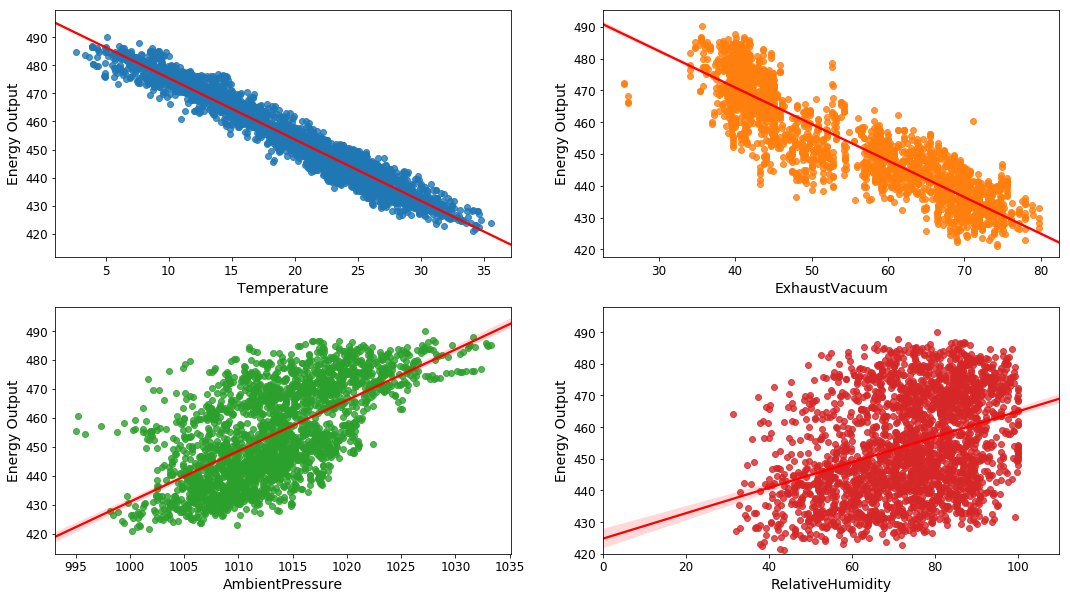

In [10]:
# Prepare four plots showing lines of best fit for energy output and other features.
line_color = {'color': 'red'}
fig, ax = plt.subplots(2, 2, figsize = (18, 10))

# Temperature
ax1 = sb.regplot(X_test['Temperature'], 
                np.ravel(predict), 
                line_kws = line_color, 
                ax = ax[0,0])
ax1.set_ylabel('Energy Output')

# Exhaust vacuum
ax2 = sb.regplot(X_test['ExhaustVacuum'],
                 np.ravel(predict), 
                 line_kws = line_color, 
                 ax = ax[0,1])
ax2.set_ylabel('Energy Output')

# Ambient pressure
ax3 = sb.regplot(X_test['AmbientPressure'], 
                 np.ravel(predict), 
                 line_kws = line_color,
                 ax = ax[1,0])
ax3.set_ylabel('Energy Output')

# Relative humidity
ax4 = sb.regplot(X_test['RelativeHumidity'],
                 np.ravel(predict), 
                 line_kws = line_color, 
                 ax = ax[1,1])
ax4.set_ylabel('Energy Output')

ax4.set_ylim(420,498)
ax4.set_xlim(0,110);

# Compare predicted values to actual values

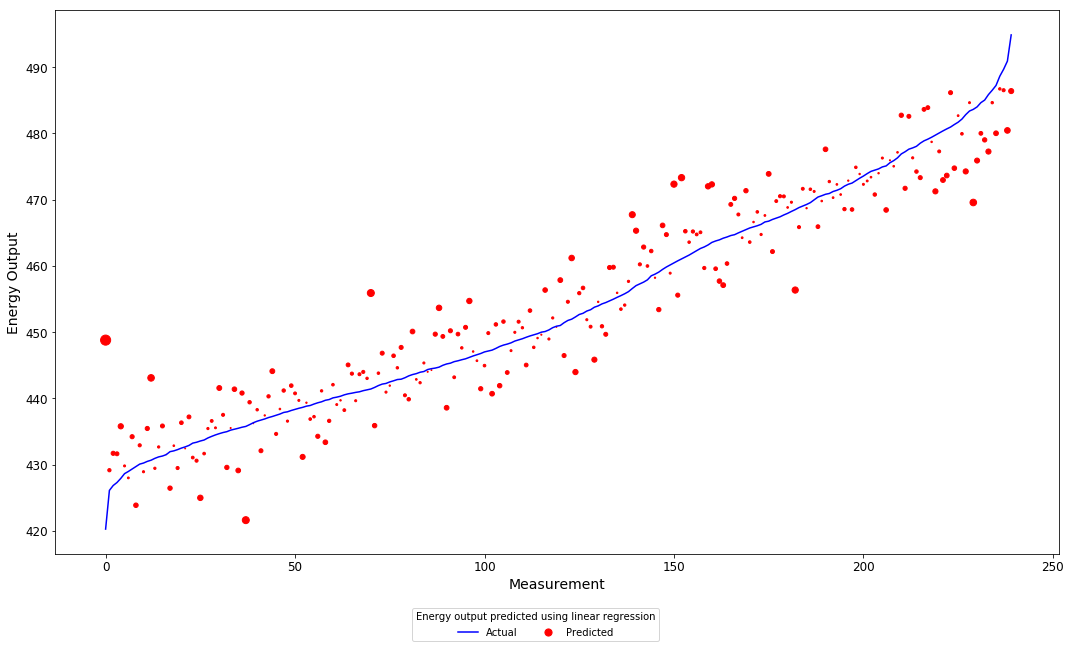

In [11]:
N = 10  # Plot every Nth value to save time and space
predict_df = results_comparison.sort_values('ActualEnergyOutput')[::N]

predict_df['diff'] = predict_df['ActualEnergyOutput'] - predict_df['PredictedEnergyOutput']
predict_df['recnum'] = np.arange(len(predict_df))
predict_df['error_pct'] = abs(predict_df['diff'] / predict_df['ActualEnergyOutput']) * 1500

ax = plt.figure(figsize = [18, 10])
plt.ylabel('Energy Output')
plt.xlabel('Measurement')
plt.plot(predict_df['recnum'], predict_df['ActualEnergyOutput'], color = 'blue');
plt.scatter(predict_df['recnum'],
            predict_df['PredictedEnergyOutput'], 
            predict_df['error_pct'], 
            color = 'red');

ax.legend(['Actual', 'Predicted'], 
           loc = 'lower center',
           ncol = 2, 
           title = 'Energy output predicted using linear regression')

plt.show()

# Retrieve the model parameters

In [12]:
coefs = lin_reg.coef_

print('Temperature coefficient: {}'.format(coefs[0]))
print('ExhaustVacuum coefficient: {}'.format(coefs[1]))
print('AmbientPressure coefficient: {}'.format(coefs[2]))
print('RelativeHumidity coefficient: {}'.format(coefs[3]))

Temperature coefficient: -1.6668474737282448
ExhaustVacuum coefficient: -0.2754574711388136
AmbientPressure coefficient: 0.5025758077163676
RelativeHumidity coefficient: -0.0968911975079362


# Manually calculate the model parameters using the normal equation

In [13]:
# Multiply the transpose of X by X, then take the inverse.
eq_part_1 = np.linalg.inv(X_train.transpose().dot(X_train))

# Multiply the transpose of X by y.
eq_part_2 = X_train.transpose().dot(y_train)

# Multiply the previous products.
model_params = eq_part_1.dot(eq_part_2)

print(model_params)

[[-1.66684747]
 [-0.27545747]
 [ 0.50257581]
 [-0.0968912 ]]
